In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))


In [2]:
percent_cell_mAP_file_path <- file.path("../results/mAP_cell_percentages.parquet")
figures_path <- file.path("../figures")
if (!dir.exists(figures_path)) {
  dir.create(figures_path)
}
percent_cell_mAP <- arrow::read_parquet(percent_cell_mAP_file_path)
dim(percent_cell_mAP)

[1] 234602     14

In [3]:
# percent_cell_mAP <- percent_cell_mAP %>% filter(Metadata_dose == 0.61)
percent_cell_mAP <- percent_cell_mAP %>% group_by(shuffle, percentage_of_cells,Metadata_Time, Metadata_dose) %>%
  summarise(mAP = mean(mean_average_precision))
percent_cell_mAP$Metadata_Time <- percent_cell_mAP$Metadata_Time * 30
head(percent_cell_mAP)

`summarise()` has grouped output by 'shuffle', 'percentage_of_cells',
'Metadata_Time'. You can override using the `.groups` argument.


shuffle,percentage_of_cells,Metadata_Time,Metadata_dose,mAP
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.1,0,0.61,0.7871287
FALSE,0.1,0,1.22,0.9237624
FALSE,0.1,0,2.44,0.9895490
FALSE,0.1,0,4.88,0.9988999
FALSE,0.1,0,9.77,1.0000000
FALSE,0.1,0,19.53,0.9977998


In [4]:
# change the shuffle values
percent_cell_mAP$shuffle <- gsub("FALSE", "No shuffle", percent_cell_mAP$shuffle)
percent_cell_mAP$shuffle <- gsub("TRUE", "Shuffle", percent_cell_mAP$shuffle)

In [5]:
color_palette_for_dose <- c(
    "0" = "#57F2F2",
    "0.61" = "#63D6D6",
    "1.22" = "#65BABA",
    "2.44" = "#68A3A3",
    "4.88" = "#668A8A",
    "9.76" = "#5E7070",
    "19.53" = "#4B5757",
    "39.06" = "#2F3D3D",
    "78.13" = "#182424",
    "156.25" = "#030A0A"
)
percent_cell_mAP$Metadata_dose <- as.character(percent_cell_mAP$Metadata_dose)
percent_cell_mAP$Metadata_dose <- factor(percent_cell_mAP$Metadata_dose,
                                             levels = c("0", "0.61", "1.22", "2.44", "4.88",
                                                        "9.76", "19.53", "39.06", "78.13", "156.25"))

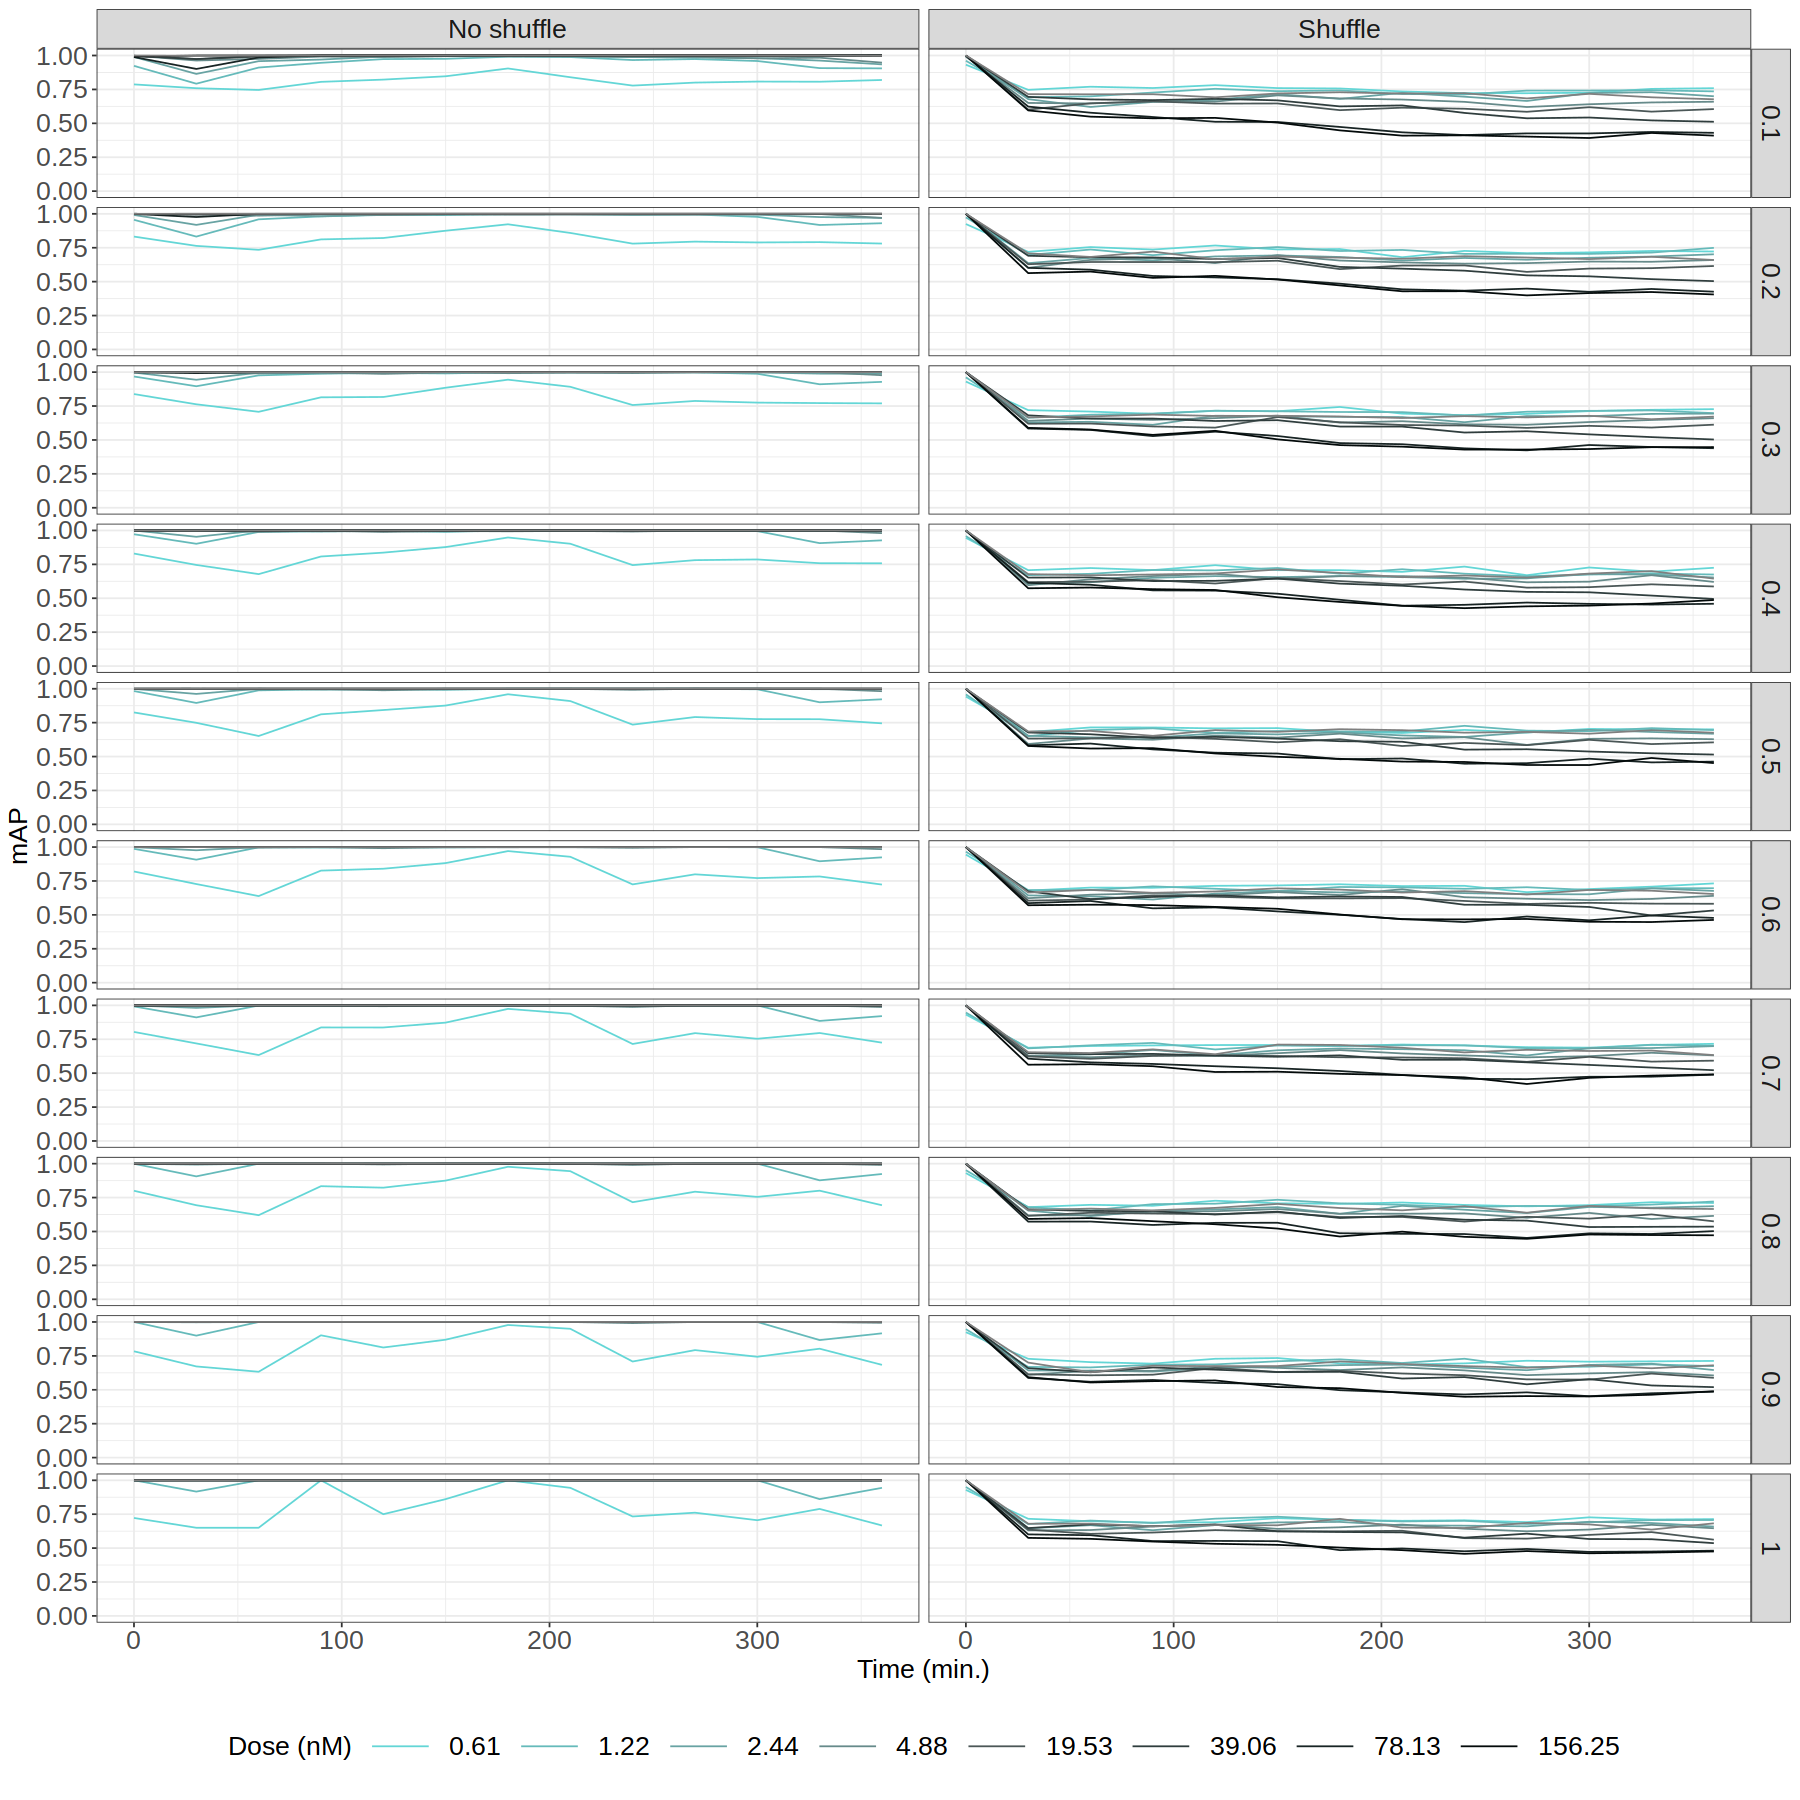

In [6]:
width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
percent_cell_line_plot <- (
    ggplot(data = percent_cell_mAP, aes(x = Metadata_Time, y = mAP))
    + geom_line(aes(
        group = Metadata_dose, 
        color = Metadata_dose))
    + labs(x="Time (min.)", y = "mAP", fill = "Dose (nM)", color = "Dose (nM)")
    + facet_grid(percentage_of_cells ~ shuffle)
    + scale_color_manual(values = color_palette_for_dose)
    + ylim(0, 1)
    + theme_bw()
    + theme(
        strip.text.x = element_text(size = 16),
        strip.text.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.text = element_text(size = 16),

        legend.title = element_text(size = 16),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.box.just = "left",
        legend.key.size = unit(1.5, "cm"),
        legend.key.width = unit(1.5, "cm"),
    )
    + guides(
        fill = guide_legend(nrow = 1, byrow = TRUE),
        color = guide_legend(nrow = 1, byrow = TRUE)
    )

)
ggsave(
    filename = file.path(figures_path, "percent_cell_mAP.png"),
    plot = percent_cell_line_plot,
    width = width,
    height = height,
    dpi = 600
)
percent_cell_line_plot